In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn.objects as sns

In [3]:
stock_entries = pd.read_csv("all_stocks_5yr.csv")

In [4]:
# https://www.grepper.com/answers/364307/sort+rows+by+values+dataframe?ucard=1
# https://www.grepper.com/answers/141110/dataframe+copy?ucard=1
def max_stat(parameter):
    max_stat_frame = stock_entries.copy(deep=True)
    max_stat_frame = max_stat_frame.sort_values(by=parameter, ascending=False)
    return max_stat_frame

In [5]:
stock_entries['date'] = [datetime.datetime.strptime(stock_entries['date'][n], '%Y-%m-%d') for n in range(len(stock_entries['date']))]

In [6]:
def create_scatter(df, param_1, param_2):
    plt.title(f"Scatter {param_1} on {param_2}")
    plt.xlabel(param_1)
    plt.ylabel(param_2)
    plt.scatter(x=df[param_1], y=df[param_2])
    plt.show()
    plt.clf()
    

In [7]:
unique_stocks = np.unique(stock_entries['Name'])
stock_portfolios = []
for stock in unique_stocks:
    stock_portfolios.append(stock_entries[stock_entries['Name'] == stock])

In [8]:
# Biggest Earning days
stock_copy = stock_entries.copy(deep=True)

# Relative normalizing
stock_copy['dif'] = (stock_copy['high'] - stock_copy['low']) / stock_copy['low'] * 100
stock_copy = stock_copy.sort_values(by='dif', ascending=False)
stock_copy = stock_copy[stock_copy['dif'] > 0]

In [19]:
company_names   = []
max_differences = []
stock_copy_trunc = stock_copy.head(50)
stock_copy_trunc.to_csv('stock_info.csv')
for stock_name in np.unique(stock_copy_trunc['Name']):
    company_filings = stock_copy_trunc[stock_copy_trunc['Name'] == stock_name]
    company_names.append(stock_name)
    max_differences.append(max(company_filings['dif']))


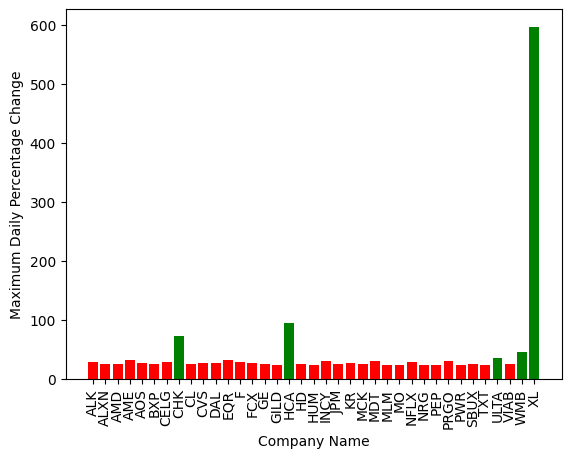

In [22]:
colorscheme = ['green' if max_differences[n] > 35 else 'red' for n in range(len(max_differences))]
plt.bar(x=company_names, height=max_differences, color=colorscheme)
plt.xticks(rotation=90)
plt.xlabel("Company Name")
plt.ylabel("Maximum Daily Percentage Change")
plt.title("Maximum Daily Percentage Change vs Company Name")
plt.show()

Idiom: Bar Chart / Mark: Line  
| Data: Attribute           | Data: Attribute Type  | Encode: Channel |  
| Company Name              | key, categorical      | Color |  
| Percentage Daily Change   | value, quantititative | vertical spatial region (y-axis) |  

In [11]:
# Top five companies with greatest relative change in a day
# XL
# HCA
# CHK
# WMB
# ULTA

In [12]:
top_five_stocks = ['XL', 'HCA', 'CHK', 'WMB', 'ULTA']
stock_entries['dif'] = (stock_entries['high'] - stock_entries['low']) / stock_entries['low']
stock_portfolios = []
for stock in top_five_stocks:
    stock_portfolios.append(stock_entries[stock_entries['Name'] == stock])

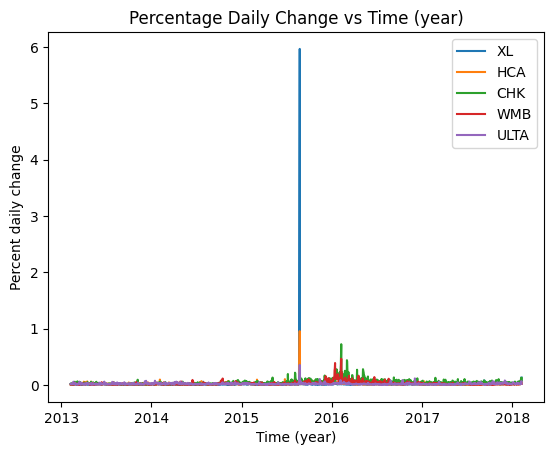

<Figure size 640x480 with 0 Axes>

In [23]:
for i in range(len(top_five_stocks)):
    plt.plot(stock_portfolios[i]['date'], stock_portfolios[i]['dif'], label=top_five_stocks[i])
    
plt.xlabel('Time (year)')
plt.ylabel('Percent daily change')
plt.title('Percentage Daily Change vs Time (year)')
plt.legend()
plt.show()
plt.clf()

Idiom: Line Graph / Mark: Line  
| Data: Attribute           | Data: Attribute Type                  | Encode: Channel |  
| Date                      | key, quantititative (temporal)        | Horizontal spatial region X-axis|  
| Percentage Daily Change   | value, quantititative                 | vertical spatial region (y-axis) |  

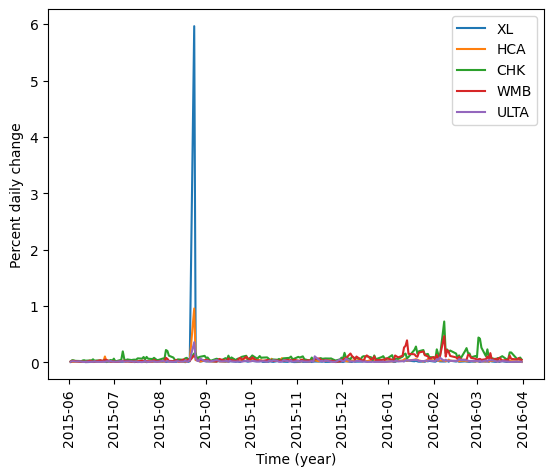

<Figure size 640x480 with 0 Axes>

In [21]:
year_2015 = datetime.datetime.strptime('2015-6-1', '%Y-%m-%d')
year_2017 = datetime.datetime.strptime('2016-4-1', '%Y-%m-%d')
zoom_stock_entries = stock_entries[year_2015 < stock_entries['date']]
zoom_stock_entries = zoom_stock_entries[zoom_stock_entries['date'] < year_2017]

zoom_stock_portfolios = []
for stock in top_five_stocks:
    zoom_stock_portfolios.append(zoom_stock_entries[zoom_stock_entries['Name'] == stock])

for i in range(len(top_five_stocks)):
    plt.plot(zoom_stock_portfolios[i]['date'], zoom_stock_portfolios[i]['dif'], label=top_five_stocks[i])
    plt.xticks(rotation=90)
plt.xlabel('Time (year)')
plt.ylabel('Percent daily change')
plt.title('Percentage Daily Change vs Time (year)')
plt.legend()
plt.show()
plt.clf()

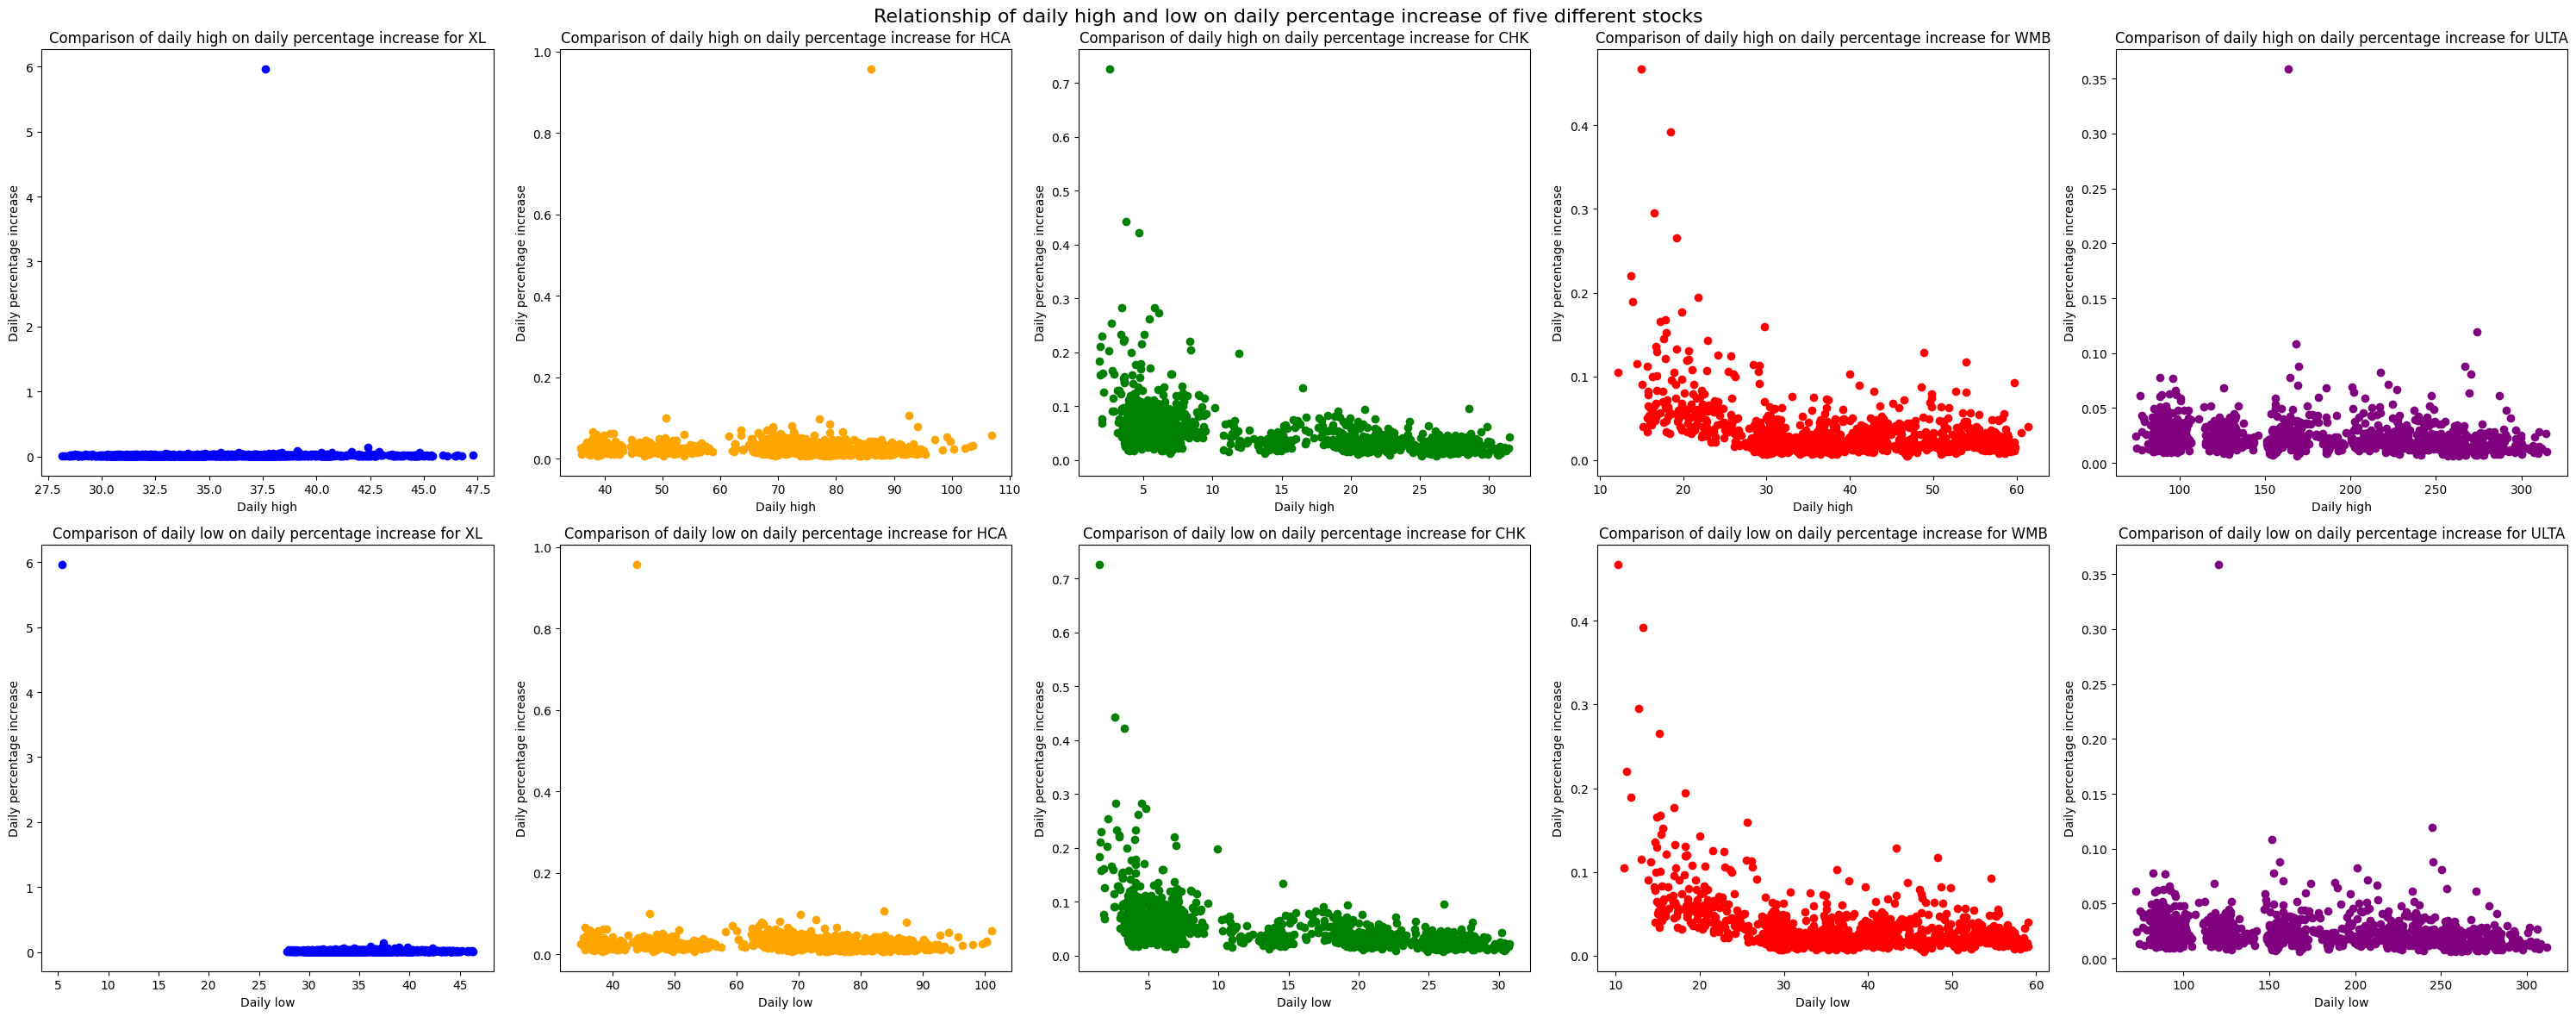

In [15]:
### Scatterplot/dot plot
### Confusion Matrix
companies   = ['XL', 'HCA', 'CHK', 'WMB', 'ULTA']
colors      = ['blue', 'orange', 'green', 'red', 'purple']
elements     = ['high', 'low']
fig, axs = plt.subplots(2, 5, figsize=(30,12))

for element in range(2):
    for company in range(5):
        axs[element, company].scatter(stock_portfolios[company][elements[element]],stock_portfolios[company]['dif'],color=colors[company])
        axs[element, company].set_title(f"Comparison of daily {elements[element]} on daily percentage increase for {companies[company]}")
        axs[element, company].set_xlabel(f"Daily {elements[element]}")
        axs[element, company].set_ylabel('Daily percentage increase')
fig.suptitle("Relationship of daily high and low on daily percentage increase of five different stocks", fontsize=16)
plt.tight_layout()
plt.show()

Idiom: Scatter plot matrix
| Data: Attribute               | Data: Attribute Type                  | Encode: Channel |  
| Company                       | key, categorical                      | color: corresponding color for each company |  
| Chart information (see below) | value, quantititative                 | vertical spatial region (y-axis) |  
  
Idiom: Scatter Plot / Mark: Dot  
| Data: Attribute           | Data: Attribute Type                  | Encode: Channel |  
| Daily High                | key, quantitative                     | horizontal spatial on common scale region (x-axis) |  
| Percentage Daily Change   | value, quantititative                 | vertical spatial region (y-axis) |  
  
Idiom: Scatter Plot / Mark: Dot  
| Data: Attribute           | Data: Attribute Type                  | Encode: Channel |  
| Daily Low                 | key, quantitative                     | horizontal spatial on common scale region (x-axis) |  
| Percentage Daily Change   | value, quantititative                 | vertical spatial region (y-axis) |  